# Capstone Project 

### In this project, you will have to identify how salary is varying with respect to other considerable factors.

## A brief understanding of the HR industry

Human resources (HR) is the division of an organization that is responsible for finding, screening, recruiting, and training job applicants, and administering employee-benefit programs.

This management is the strategic approach to the efficient management of people in any organization in a way that can help their business gain a competitive advantage. It is designed to improve employee performance in service of an employer's strategic objectives.

### Steps to be performed for successful completion of capstone project:

1. Understand the data set - Feature description provided below.
2. Check the number of variables that are normally distributed & explain
3. Find out the correlation between variables using spearman rank correlation & explain
4. Examine the relationship between categorical variables and the dependent variable & explain
5. Clean and pre-process the data with other operations required, like, missing values, handling outliers, etc. as and when necessary & explain
6. Apply ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable for the same & explain

Solving this problem will help you to gain a basic understanding of the HR industry and also how analytics and data science are applied in practice in this domain.

# Introduction

### HR is anything related to managing people within a company or organization. This means decisions, strategies, principles, operations, practices, functions, activities, and the methods used to manage employees.
###  It means the workforce, i.e., the employees of a company and what skills and energy they bring. This includes any ideas, creativity, knowledge, and talents that employees bring with them and use to help the organization be successful. In other words, the resources a person has or the knowledge and experience developed over the years.
### HR focuses on bringing in (recruiting) new employees with new talents for the company and managing employees. Another function is to guide and help said employees by providing direction when necessary. 
### HR also serves to determine the number and type of employees needed to achieve the company’s goals. Research is performed in this function because planning requires information to be collected and analyzed for the forecasting of human resource supplies and the prediction of future human resource needs.
### HR department that determines how much employees should be paid for certain jobs using a system of assessment. Compensation costs companies a lot so it is something that needs serious attention in the human resource planning stage. Compensation affects staffing because people generally want to work for an organization that offers more pay in exchange for the work done. It provides an important motivation for employees to achieve more in their jobs and reach higher levels.

# Basic EDA Steps

### Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Admin/Downloads/New_data_Set.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


#### It shows top 5 rows from the dataset.

In [5]:
df.tail()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.840,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.295,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.840,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.535,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG
4999,Male,0,Yes,Yes,Two year,Yes,No,88,199970.74,79988.296,9998.537,627.839984,6003300,NaN,312.307316,311.081089,118.75,,72,PG


#### It shows bottom 5 rows from the dataset.

In [6]:
df.dtypes

Gender             object
Business            int64
Dependancies       object
Calls              object
Type               object
Billing            object
Rating             object
Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Total_Sales        object
Months              int64
Education          object
dtype: object

#### So, there are 'int', 'float' as well as 'object' data types in our dataset

In [7]:
df.shape

(5000, 20)

#### There are 5000 rows and 20 columns in given dataset.

In [8]:
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


#### It is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

In [9]:
df.nunique()

Gender               2
Business             2
Dependancies         2
Calls                2
Type                 3
Billing              2
Rating               2
Age                 65
Salary            5000
Base_pay          4883
Bonus             5000
Unit_Price        3836
Volume            4831
openingbalance    2986
closingbalance    4011
low               4014
Unit_Sales        1434
Total_Sales       4706
Months              73
Education            4
dtype: int64

#### nunique function return number of unique elements in the columns.

In [10]:
df.isnull()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


#### isnull is used to find null values in dataset, suppose if there are null values it will be shown as True, but it's hard to find it.

In [11]:
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

#### Above code '.sum()' is good practice as it gives count of all null values in specific columns

#### We can see that Base_pay, openingbalance and Total_Sales contains missing values.

### Converting Dtypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

#### From above we got Base_pay, openingbalance and Total_Sales columns with na values and Total_Sales data types is object so it is necessary to convert object data type.

In [13]:
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'], errors = 'coerce')

# 'error = 'coerce'' forces values to convert it into numeric == which means if any string values to conert into numeric dtype.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4984 non-null   f

#### Now, we can see object data type of Total_Sales is converted to float.

### Treating Null Values

#### So, I'm going to fill null values with mean values.

In [15]:
df['Base_pay'].mean()

40046.18770678186

In [16]:
df["Base_pay"].fillna(value = df['Base_pay'].mean(),inplace = True)

In [17]:
df['openingbalance'].mean()

43.92202005048581

In [18]:
df["openingbalance"].fillna(value = df['openingbalance'].mean(),inplace = True)

In [19]:
df['Total_Sales'].mean()

2272.3739767255197

In [20]:
df["Total_Sales"].fillna(value = df['Total_Sales'].mean(),inplace = True)

In [21]:
df.isnull().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

#### After trating missing values we can see that there is no null values in our dataset.

## Business Sense

#### - After seeing and visualizng the data as HR it's important to see which features may change Salary of Employee in the dataset.

#### - The dimensions of human resource management are designed to cater to several arenas that define this domain.

#### - The dataset may help for working professionals as they leapfrog in their careers with correct theoretical and practical understanding.

#### - Features like Unit_Sales, Total_Sales, Unit_Price, etc. can helps in understanding the employees working progess and dedication towards work in domain.

#### - The data also shows there are employees which are educated and uneducated, underage, having businesses and also number of person dependent on the person working in company.

#### - The success is based on how much an individual works on themselves and develops trademark qualities that stand them above others, as HR it is to ensure that every employees working in their sectors feel valued, appreciated and looked after in their organizations and to help them unlock their potential.

# Number of variables that are normally distributed

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

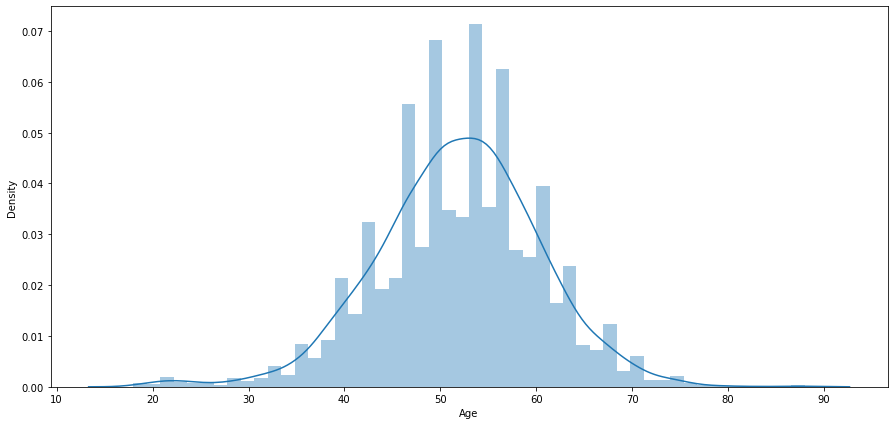

In [22]:
plt.figure(figsize=(15, 7))
sns.distplot(df['Age'])

#### 'Age' is normally distributed.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

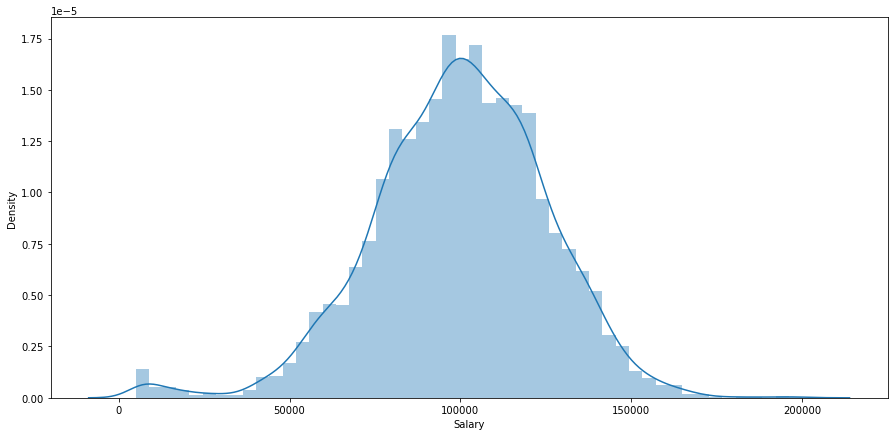

In [23]:
plt.figure(figsize=(15, 7))
sns.distplot(df['Salary'])

#### 'Salary' is normally distributed.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Base_pay', ylabel='Density'>

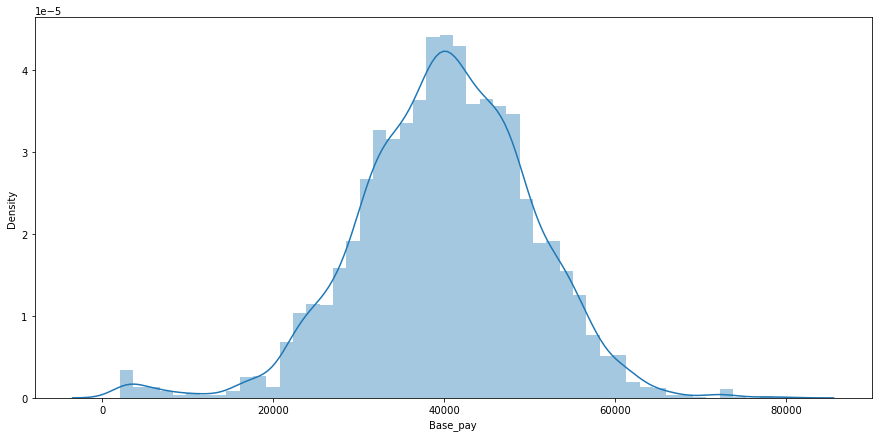

In [24]:
plt.figure(figsize=(15, 7))
sns.distplot(df['Base_pay'])

#### 'Base_pay' is normally distributed.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bonus', ylabel='Density'>

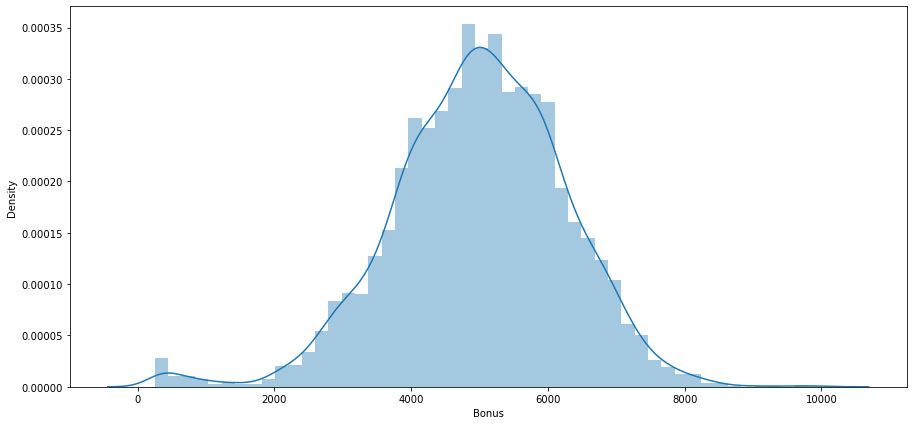

In [25]:
plt.figure(figsize=(15, 7))
sns.distplot(df['Bonus'])

#### 'Bonus' is normally distributed.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volume', ylabel='Density'>

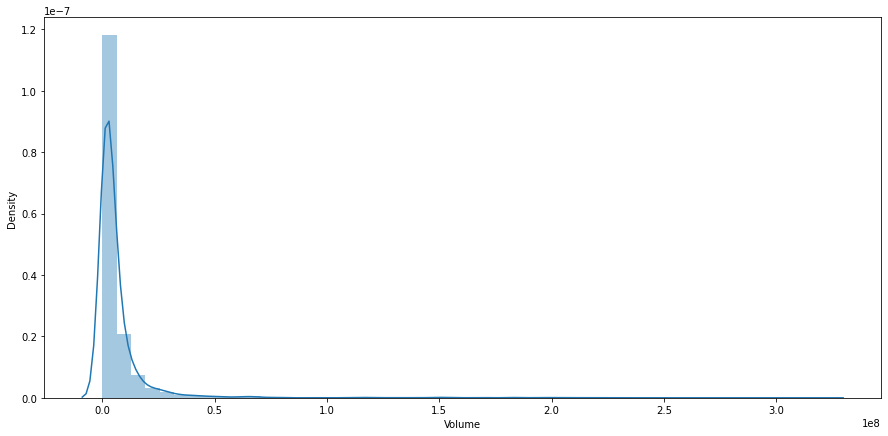

In [26]:
plt.figure(figsize=(15, 7))
sns.distplot(df['Volume'])

#### 'Volume' is not normally distributed.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='low', ylabel='Density'>

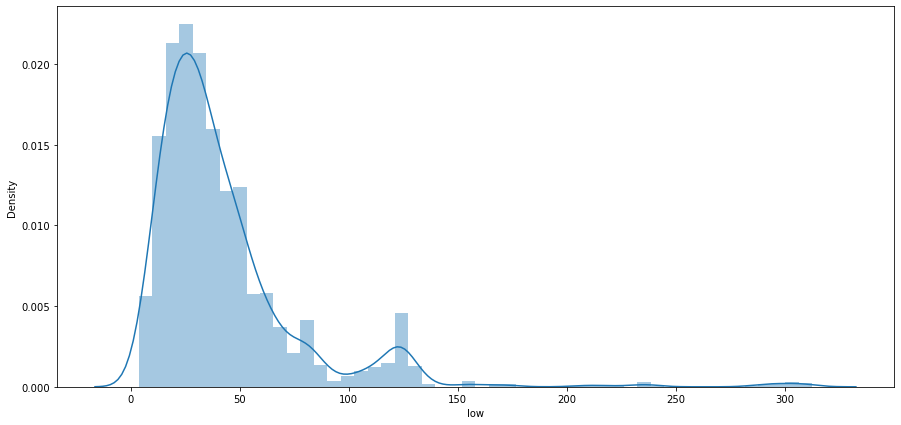

In [27]:
plt.figure(figsize=(15, 7))
sns.distplot(df['low'])

#### 'low' is not normally distributed.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit_Price', ylabel='Density'>

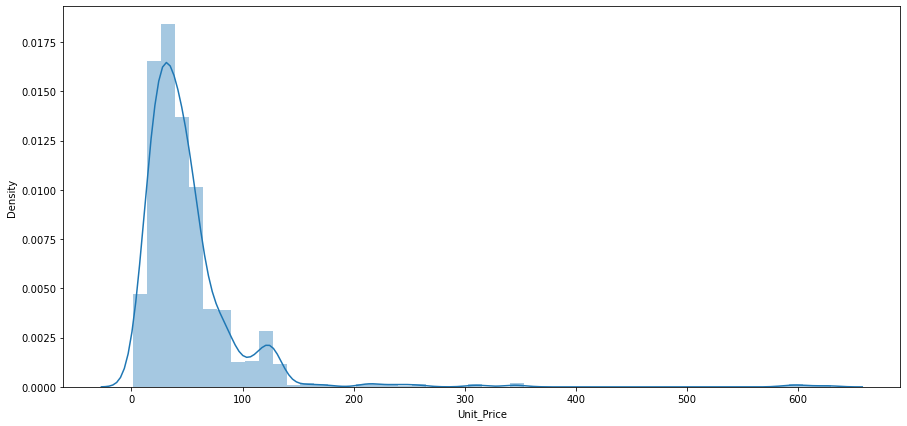

In [28]:
plt.figure(figsize=(15, 7))
sns.distplot(df['Unit_Price'])

#### 'Unit_Price' is not normally distributed.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='closingbalance', ylabel='Density'>

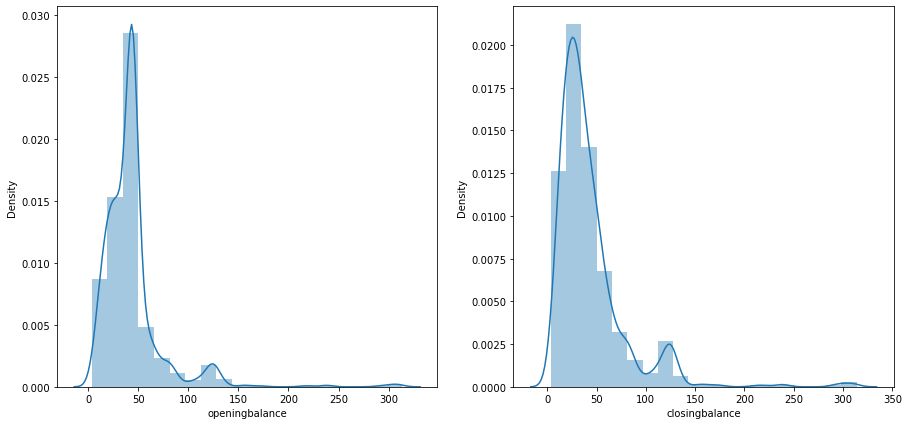

In [29]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.distplot(df['openingbalance'], bins=20, kde=True)


plt.subplot(1, 2, 2)
sns.distplot(df['closingbalance'], bins=20, kde=True)

#### 'openingbalance' and 'closingbalance' are not normally distributed.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit_Sales', ylabel='Density'>

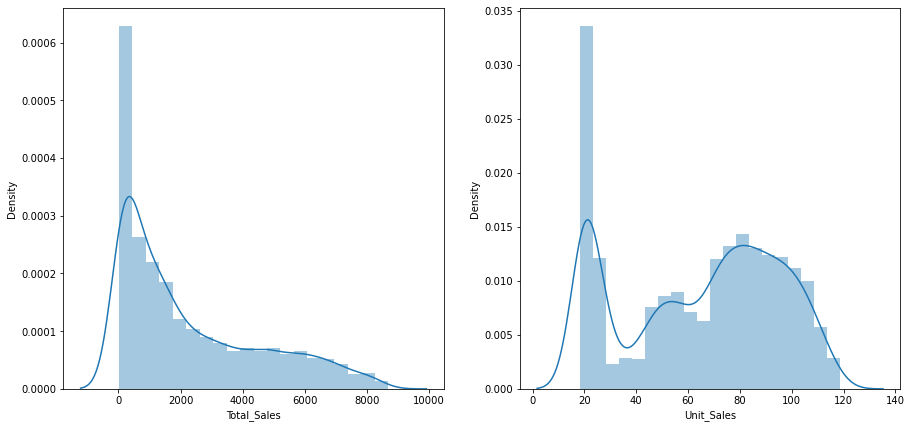

In [30]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.distplot(df['Total_Sales'], bins=20, kde=True)


plt.subplot(1, 2, 2)
sns.distplot(df['Unit_Sales'], bins=20, kde=True)

#### 'Total_Sales' and 'Unit_Sales' are not normally distributed.

### From above charts we can conclude that,

### - (Age, Salary, Base_pay & Bonus) are normally distributed features.

### - (Volume, low, Unit_price, openingbalance, closingbalance, Unit_sales & Total_sales) are not normally distributed features.

# Correlation Matrix

In [31]:
df.corr(method ='spearman')

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
Business,1.000000,-0.008435,-0.018403,-0.019262,-0.018403,-0.019480,-0.002192,-0.006726,-0.007485,-0.018103,-0.018363,-0.019781,-0.012282
Age,-0.008435,1.000000,0.202282,0.192930,0.202282,0.128266,-0.039345,0.088145,0.440989,0.202040,0.202268,0.196067,0.222837
Salary,-0.018403,0.202282,1.000000,0.994006,1.000000,0.811713,-0.390488,0.369333,0.346498,0.999859,0.999997,0.996367,0.603796
Base_pay,-0.019262,0.192930,0.994006,1.000000,0.994006,0.808311,-0.390056,0.361648,0.339834,0.993859,0.994002,0.990375,0.597308
Bonus,-0.018403,0.202282,1.000000,0.994006,1.000000,0.811713,-0.390488,0.369333,0.346498,0.999859,0.999997,0.996367,0.603796
Unit_Price,-0.019480,0.128266,0.811713,0.808311,0.811713,1.000000,-0.324230,0.280829,0.263699,0.812412,0.811735,0.808752,0.550062
Volume,-0.002192,-0.039345,-0.390488,-0.390056,-0.390488,-0.324230,1.000000,-0.087025,-0.147108,-0.392209,-0.390505,-0.389874,-0.262077
openingbalance,-0.006726,0.088145,0.369333,0.361648,0.369333,0.280829,-0.087025,1.000000,0.252224,0.369361,0.369325,0.368195,0.144490
closingbalance,-0.007485,0.440989,0.346498,0.339834,0.346498,0.263699,-0.147108,0.252224,1.000000,0.346278,0.346485,0.341306,0.365927
low,-0.018103,0.202040,0.999859,0.993859,0.999859,0.812412,-0.392209,0.369361,0.346278,1.000000,0.999856,0.996214,0.603752


#### From 'Spearman' method we can found that which features are highly correlated with dependent variable i.e 'Salary'

#### Let's visualize it on heatmap to understand it better.

<AxesSubplot:>

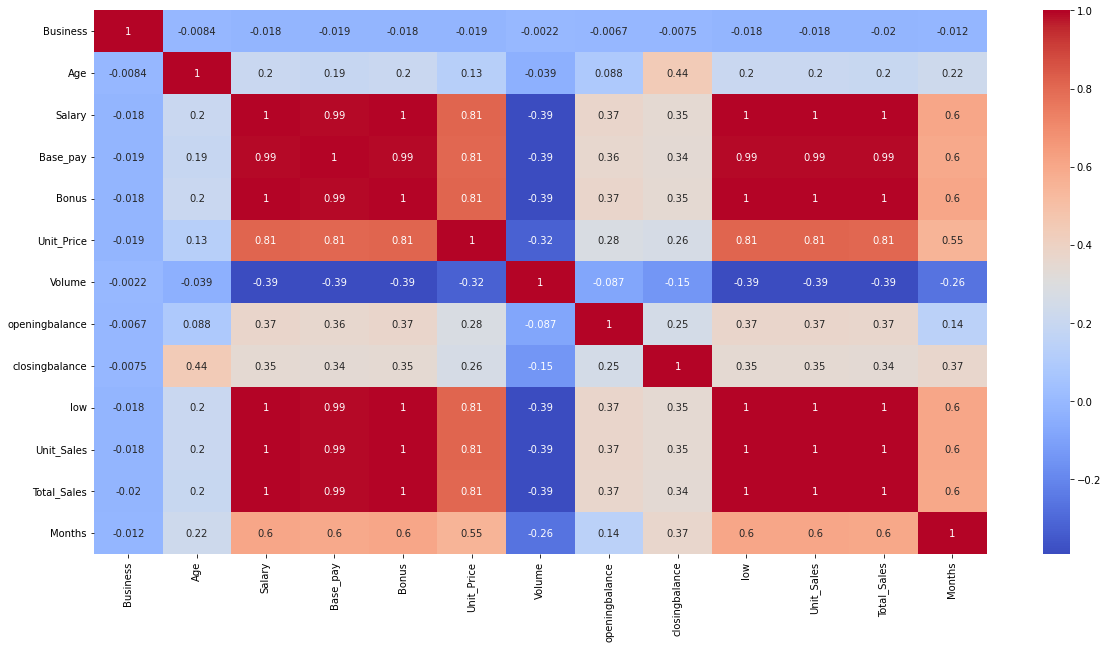

In [32]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(method ='spearman'), annot = True, cmap = 'coolwarm')

#### So, from heatmap using 'Spearman' correlation method we can see that Base_pay, Bonus, low, Unit_Sales and Total_Sales are highly correlated with dependent variable Salary.

#### How they are correlated with Salary? 

#### We need to check values from -1 to 1 for spearman correlation.

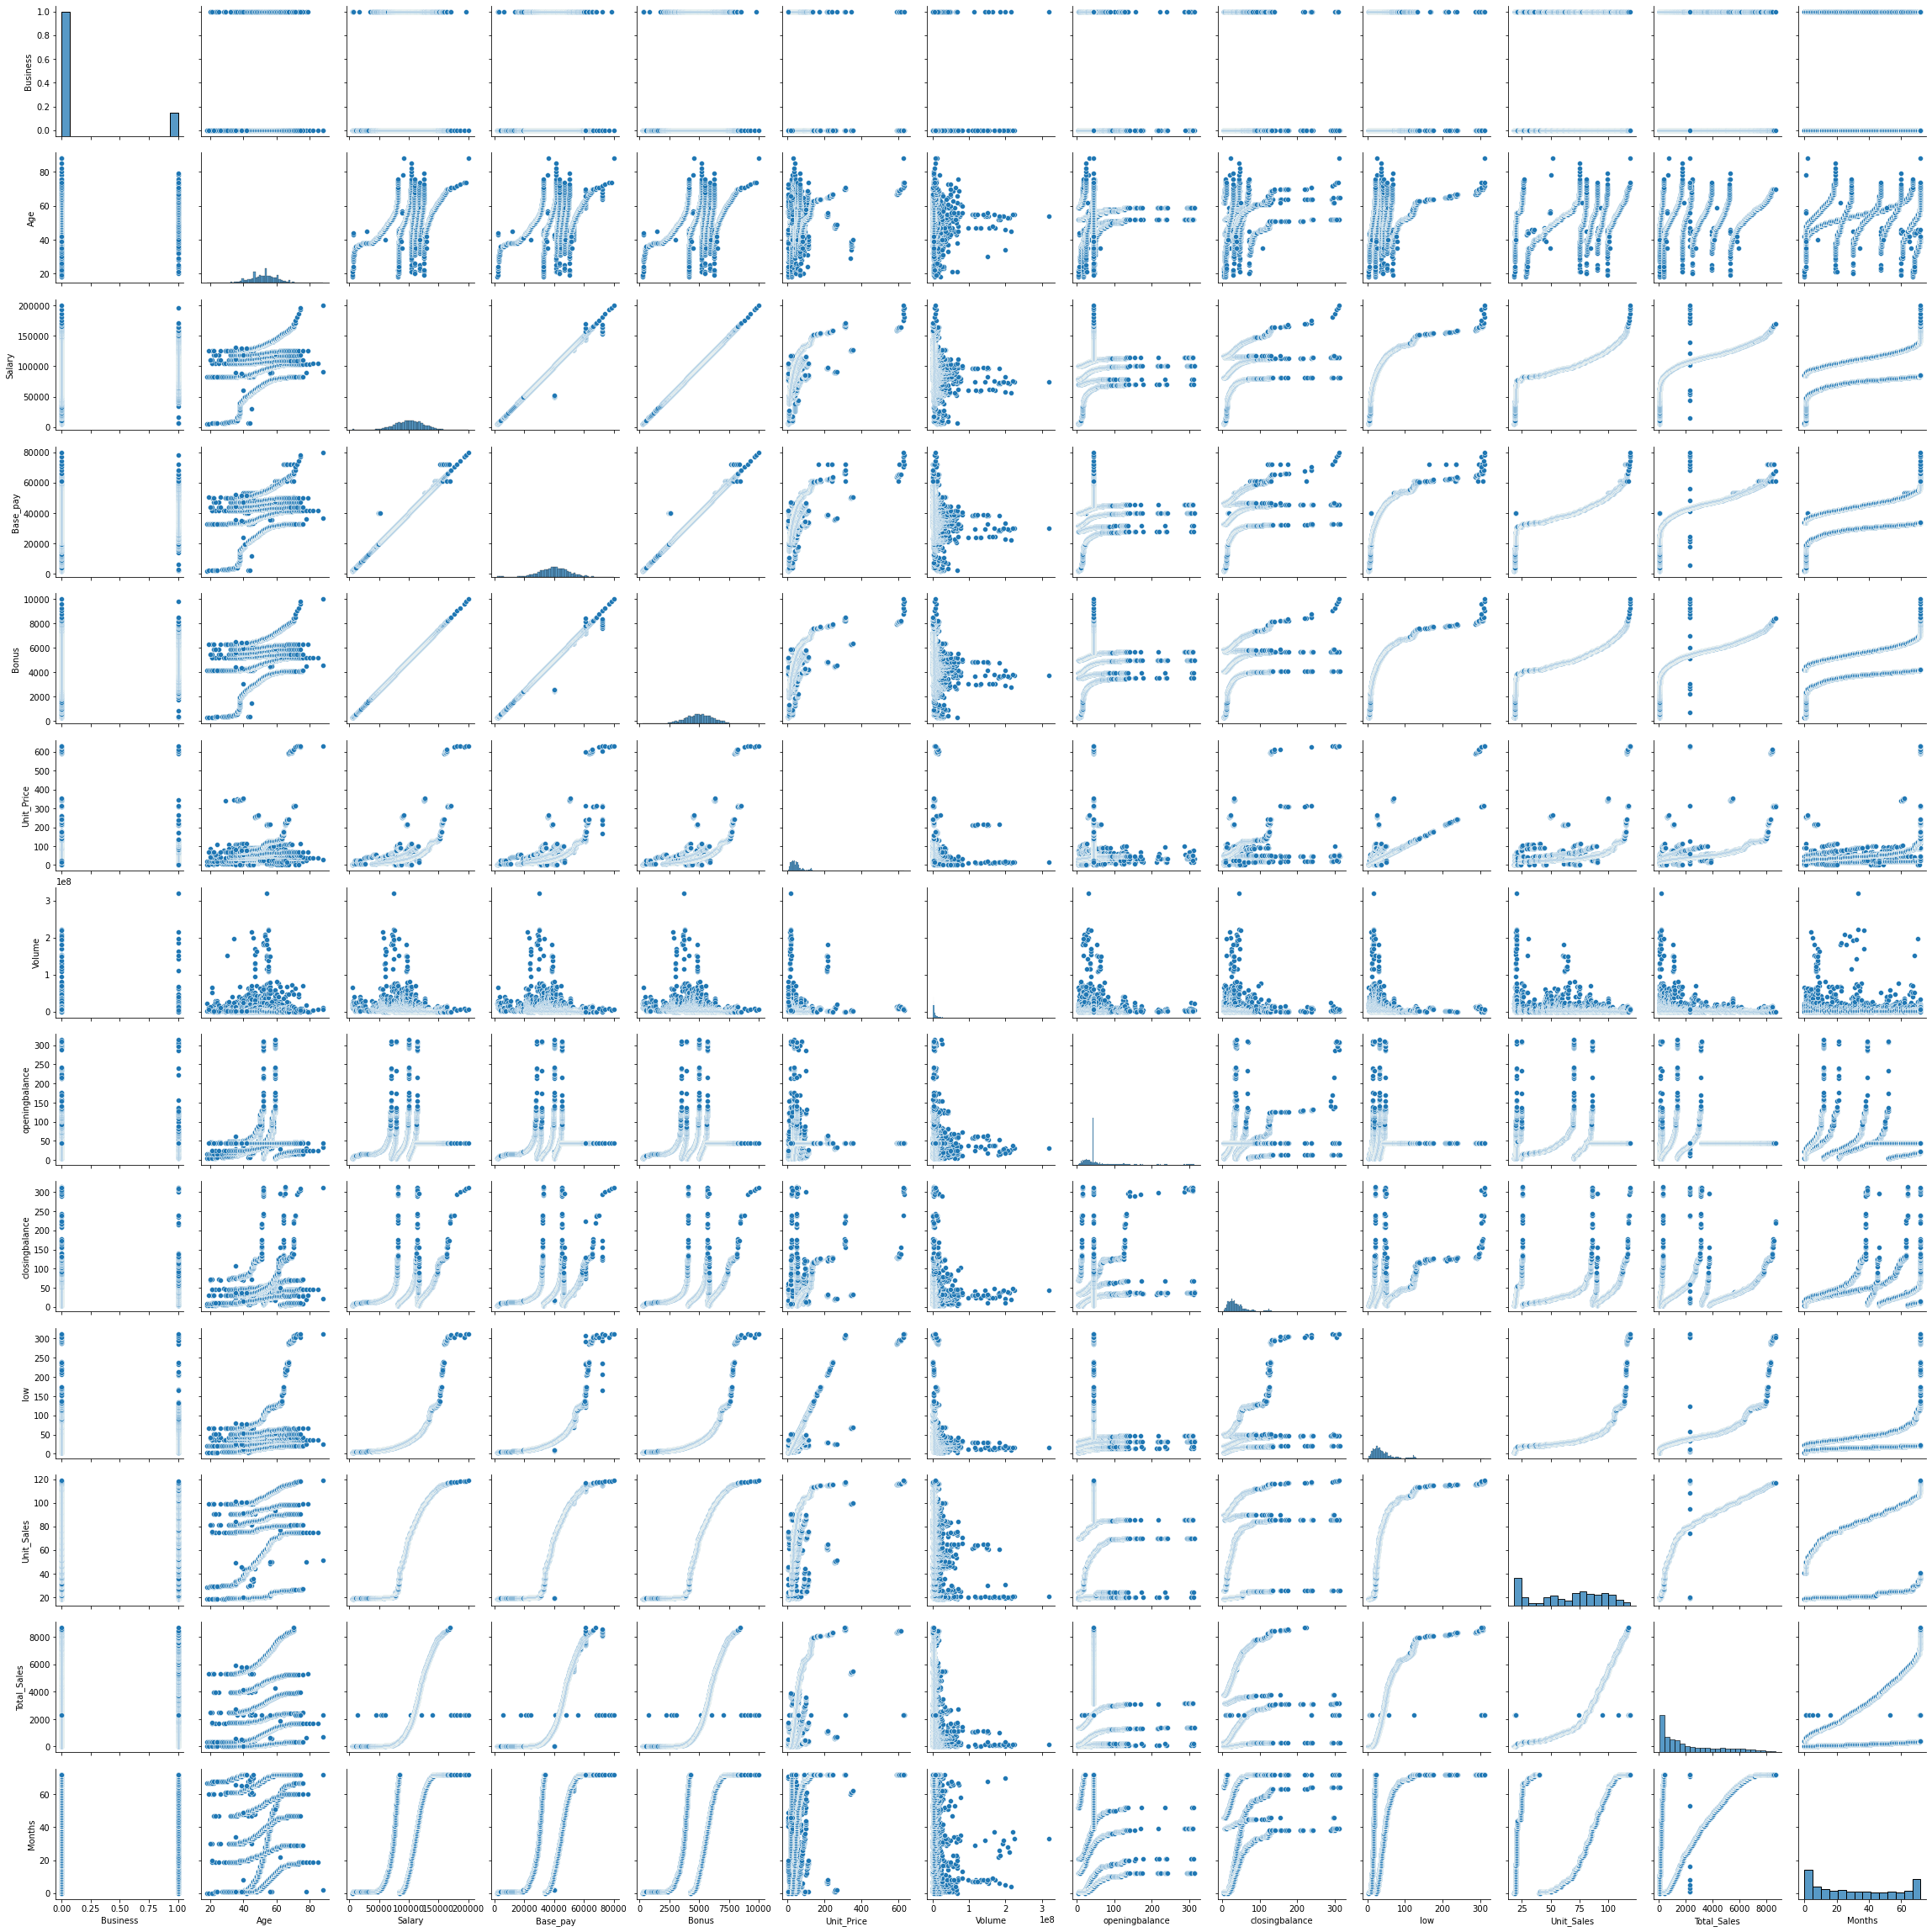

In [33]:
sns.pairplot(df)

#### Pair plot shows us multiple pairwise bivariate distributions in a dataset, the features that are highly correlated gives diagonal plot.

# Relationship between categorical variables and the dependent variable

In [34]:
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


#### Categorical variables in dataset are 'Gender', 'Dependencies', 'Calls', Type', 'Billing', 'Rating' and 'Education'.

#### Dependent variable is 'Salary'.

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

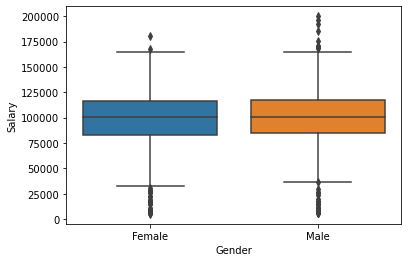

In [35]:
sns.boxplot(x='Gender', y='Salary', data = df)

#### Box plot shows Male generates more salary than Female if we look at outliers.

<AxesSubplot:xlabel='Dependancies', ylabel='Salary'>

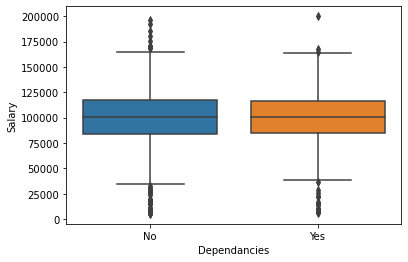

In [36]:
sns.boxplot(x='Dependancies', y='Salary', data = df)

#### Most people are dependent on person which are working in company.

<AxesSubplot:xlabel='Calls', ylabel='Salary'>

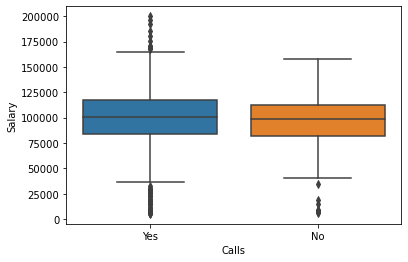

In [37]:
sns.boxplot(x='Calls', y='Salary', data = df)

#### Yes, most of the person has authority to make calls to generate sales.

<AxesSubplot:xlabel='Type', ylabel='Salary'>

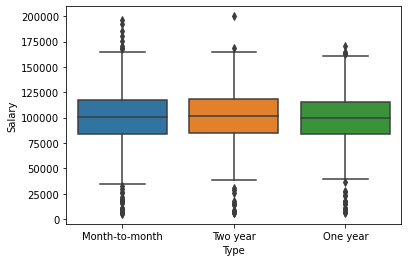

In [38]:
sns.boxplot(x='Type', y='Salary', data = df)

#### Many people have momth-to-month salary settlement type than one year and twoyear.

<AxesSubplot:xlabel='Billing', ylabel='Salary'>

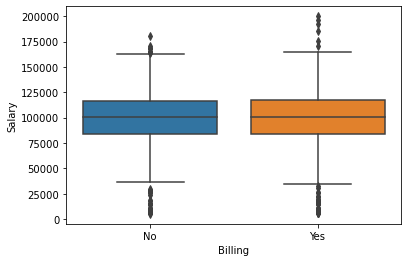

In [39]:
sns.boxplot(x='Billing', y='Salary', data = df)

#### If we took outliers in consideration we can say yes many people are subscribed to billing plans.

<AxesSubplot:xlabel='Rating', ylabel='Salary'>

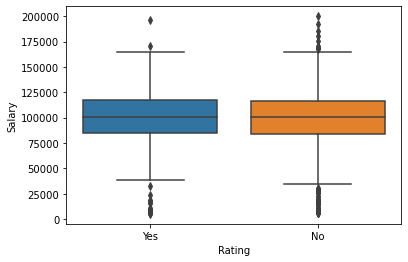

In [40]:
sns.boxplot(x='Rating', y='Salary', data = df)

#### Yes, most of the peple in the company has been given a rating by a superior.

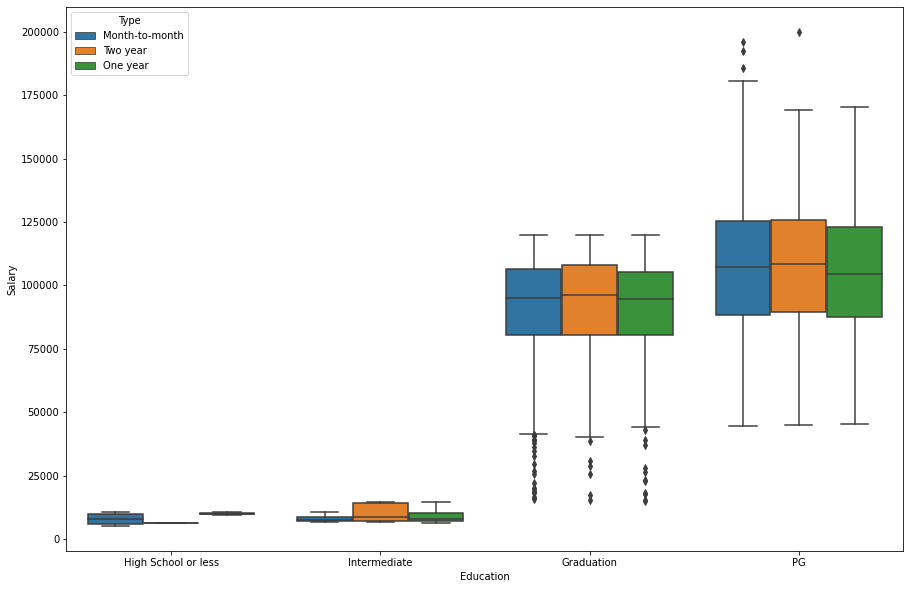

In [41]:
plt.figure(figsize = (15,10))

sns.boxplot(x = 'Education', y = 'Salary', hue = 'Type', data = df)
df.groupby(['Education', 'Type']).mean()

plt.show()

#### Well, Graduated and Post Graduated category makes more sales and remaining category makes low or negligible sales which may affects their salaries drastically.

#### From box plot, Graduated and Post Graduated people have more salary than other two groups, if we look carefully Post Graduated have more salary than Graduated people, but in graduated category month-to-month type of settlement have more salary than others and in PG category One year settlement type have more salary.

#### From above all the charts we can see there are outliers in the dataset.

# Clean and pre-process the data

### Handling Outliers

#### As we can see in above plot there are outliers in the dataset and I think it is not necessary to remove outliers from dataset as it also have some values which is useful for further steps and model building. So I've not removed or treated outliers in model building.

## Prepare the data for model

In [42]:
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


#### There are numeric as well as string values in the given dataset. Numeric data type is known as int and string is know as object data type. Let's check it below.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        5000 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  5000 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     5000 non-null   f

### Creating dummy variables.

#### Convert object data type to dummy variables.

######  One Hot Encoding

In [44]:
pd.get_dummies(df['Gender'])

#'pd.get_dummies' converts categorical data type to binary data type

,Female,Male
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
4995,1,0
4996,0,1
4997,0,1
4998,0,1


In [45]:
gender=pd.get_dummies(df['Gender'],drop_first=True).astype('int32')

In [46]:
df['Gender']=gender

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   int32  
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        5000 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  5000 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     5000 non-null   f

#### Now, we can see Gender column is changed to int data type.

In [48]:
Dependancies = pd.get_dummies(df['Dependancies'], drop_first = True).astype('int32')

In [49]:
df['Dependancies'] = Dependancies

In [50]:
Calls = pd.get_dummies(df['Calls'], drop_first = True).astype('int32')

In [51]:
df['Calls'] = Calls

In [52]:
Billing = pd.get_dummies(df['Billing'], drop_first = True).astype('int32')

In [53]:
df['Billing'] = Billing

In [54]:
Rating = pd.get_dummies(df['Rating'], drop_first = True).astype('int32')

In [55]:
df['Rating'] = Rating

In [56]:
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,0,0,0,1,Month-to-month,0,1,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,High School or less
1,0,0,0,1,Month-to-month,0,1,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,1,0,0,1,Month-to-month,1,0,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,High School or less
3,0,1,0,1,Month-to-month,1,1,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,High School or less
4,1,0,0,1,Month-to-month,1,1,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


#### All the columns with categorical variables got replaced with dummy variables using one hot encoder.

In [57]:
df.dtypes

Gender              int32
Business            int64
Dependancies        int32
Calls               int32
Type               object
Billing             int32
Rating              int32
Age                 int64
Salary            float64
Base_pay          float64
Bonus             float64
Unit_Price        float64
Volume              int64
openingbalance    float64
closingbalance    float64
low               float64
Unit_Sales        float64
Total_Sales       float64
Months              int64
Education          object
dtype: object

#### Here only Type and Education feature is still in object data type. Because we have 3 and 4 values in these columns i'm using mapping function in next step. 

##### Mapping Function

In [58]:
df.Type.unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

#### So, there are 3 values like 'Month-to-month', 'Two year', 'One year' in Type column

In [59]:
pd.get_dummies(df['Type']).head(10)

,Month-to-month,One year,Two year
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,1,0
8,1,0,0
9,1,0,0


In [60]:
df_type = df['Type'].map({'Month-to-month':1, 'One year':2, 'Two year':3})
df_type.head(10)

0    1
1    1
2    1
3    1
4    1
5    3
6    3
7    2
8    1
9    1
Name: Type, dtype: int64

In [61]:
df.Education.unique()

array(['High School or less', 'Intermediate', 'Graduation', 'PG'],
      dtype=object)

#### So, there are 4 values like 'High School or less', 'Intermediate', 'Graduation', 'PG' in Type column

In [62]:
pd.get_dummies(df['Education']).head(10)

,Graduation,High School or less,Intermediate,PG
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0


In [63]:
df_education = df.Education.map({'High School or less':1, 'Intermediate':2, 'Graduation':3, 'PG':4})
df_education.head()

0    1
1    1
2    1
3    1
4    1
Name: Education, dtype: int64

In [64]:
df.drop(['Type', 'Education'], axis = 1, inplace = True)

#### I've dropped Type and Education variables with object data type as new dummy variables has been created from above mapping functions.

In [65]:
df.head()

,Gender,Business,Dependancies,Calls,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
0,0,0,0,1,0,1,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0
1,0,0,0,1,0,1,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0
2,1,0,0,1,1,0,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0
3,0,1,0,1,1,1,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0
4,1,0,0,1,1,1,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1


###  Concat the above data types  

#### It is necessary to concat the data types of new created Type and Education variables.

In [66]:
df = pd.concat([df, df_type, df_education], axis = 1)

In [67]:
df.head()

,Gender,Business,Dependancies,Calls,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Type,Education
0,0,0,0,1,0,1,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,1,1
1,0,0,0,1,0,1,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,1,1
2,1,0,0,1,1,0,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,1,1
3,0,1,0,1,1,1,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,1,1
4,1,0,0,1,1,1,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,1,1


#### After concat is done, now our dataset is ready for model building.

### Re-ordering of Salary feature

In [68]:
titles = list(df.columns)
titles

['Gender',
 'Business',
 'Dependancies',
 'Calls',
 'Billing',
 'Rating',
 'Age',
 'Salary',
 'Base_pay',
 'Bonus',
 'Unit_Price',
 'Volume',
 'openingbalance',
 'closingbalance',
 'low',
 'Unit_Sales',
 'Total_Sales',
 'Months',
 'Type',
 'Education']

In [69]:
titles[7],titles[19] = titles[19],titles[7]
titles

['Gender',
 'Business',
 'Dependancies',
 'Calls',
 'Billing',
 'Rating',
 'Age',
 'Education',
 'Base_pay',
 'Bonus',
 'Unit_Price',
 'Volume',
 'openingbalance',
 'closingbalance',
 'low',
 'Unit_Sales',
 'Total_Sales',
 'Months',
 'Type',
 'Salary']

In [70]:
df = df[titles]
df

,Gender,Business,Dependancies,Calls,Billing,Rating,Age,Education,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Type,Salary
0,0,0,0,1,0,1,18,1,2035.600,254.4500,3.770000,21226600,3.75000,3.760000,3.650000,18.25,18.800000,0,1,5089.00
1,0,0,0,1,0,1,19,1,2279.248,284.9060,3.740000,10462800,3.85000,3.680000,3.650000,18.40,18.850000,0,1,5698.12
2,1,0,0,1,1,0,22,1,2358.660,294.8325,3.890000,18761000,4.23000,4.290000,3.720000,18.70,18.900000,0,1,5896.65
3,0,1,0,1,1,1,21,1,2450.048,306.2560,4.350000,66130600,4.26000,4.310000,3.830000,18.75,19.000000,0,1,6125.12
4,1,0,0,1,1,1,23,1,2498.000,312.2500,4.340000,26868200,4.79000,4.410000,4.080000,18.80,19.050000,1,1,6245.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,1,0,0,72,4,72278.720,9034.8400,629.511067,3927000,43.92202,293.838840,310.955001,117.80,2272.373977,72,1,180696.80
4996,1,0,0,1,1,0,73,4,74274.360,9284.2950,627.841071,6031900,43.92202,301.311314,309.610028,118.60,2272.373977,72,1,185685.90
4997,1,0,0,1,1,0,74,4,77054.720,9631.8400,625.860033,7949400,43.92202,306.040009,303.483494,118.60,2272.373977,72,1,192636.80
4998,1,1,0,1,1,1,74,4,78388.280,9798.5350,629.510005,3908400,43.92202,308.579987,312.432438,118.65,2272.373977,72,1,195970.70


#### Salary is shifted at last in column feature.

# Model Building

### Assumptions:
#### - As I have not removed outliers I'm unable to do Linear Regression model so I'm performing Decision Tree and Random Forest model building.
#### - We can perform Variance Threshold to check if there are any constant columns in dataset under ML model building there are no constant columns in our dataset so it is not required.

### Applying ML algorithm

### Split Train - Test 

#### Independent and Dependent Variables

Independent Variable = X

In [71]:
X = df[['Age','Base_pay','Bonus','Unit_Price','Volume','openingbalance','closingbalance','low','Unit_Sales','Total_Sales','Months']]

In [72]:
X.shape

(5000, 11)

In [73]:
X.ndim

2

Dependent Variable = y

In [74]:
y = df['Salary']

In [75]:
y.shape

(5000,)

In [76]:
y.ndim

1

In [77]:
y = y.values.reshape(-1,1)

In [78]:
y.shape

(5000, 1)

### Split the dataset in training set and test set

#### Import train test split libraries

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    
X_train.shape, X_test.shape

((3350, 11), (1650, 11))

In [81]:
y_train.shape, y_test.shape

((3350, 1), (1650, 1))

# Decision Tree Regression

In [82]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [83]:
regressor = DecisionTreeRegressor(criterion = 'mse')  # mse = mean square error
regressor.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse')

In [84]:
regressor.score(X_test, y_test)

0.9999289017096641

### The score of Decision Tree Regression model is '0.999918..' which is approx to 1.

In [85]:
regressor.predict([[18,2035.60000,254.450000,3.770000,21226600,3.750000,3.760000,3.650000,18.25,18.80,0]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5089.])

### From above code in 'regressor.predict' we take all input values of independent variables(X) from 1st row and got same output of dependent variable(Salary) which is 5089.

In [86]:
X.head(1)

,Age,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
0,18,2035.6,254.45,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0


### We used above values of independent variables(X) in 'regressor predict' code to cross check if our prediction is right or wrong.

In [87]:
df.head(1)

,Gender,Business,Dependancies,Calls,Billing,Rating,Age,Education,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Type,Salary
0,0,0,0,1,0,1,18,1,2035.6,254.45,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,1,5089.0


### We can see here 'Salary' of 1st row is same as 'regressor predict' of independent variables(X), so our prediction is right.

In [88]:
y_pred = regressor.predict(X_test)
y_pred

array([ 64664.69603, 118155.4546 , 143094.962  , ...,  82990.14503,
        84302.56772,  98278.9615 ])

In [89]:
y_test

array([[ 64631.43297],
       [118137.1411 ],
       [143137.3465 ],
       ...,
       [ 82980.10978],
       [ 84297.27007],
       [ 98265.61741]])

### When we compare 'predict(X_test)' it gives values nearer or same as 'y_test'.

## r_2 score

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999289017096641

### So it is approx 1, the two variables are perfectly correlated, i.e., with no variance at all.

## Plotting the Decision Tree

### Creating a dot file then we need to convert this dot file into image then we use a image to create a graph

In [91]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [92]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [93]:
dot_data = tree.export_graphviz(regtree, out_file=None)

### Importing required libraries

In [94]:
from IPython.display import Image

In [95]:
import pydotplus

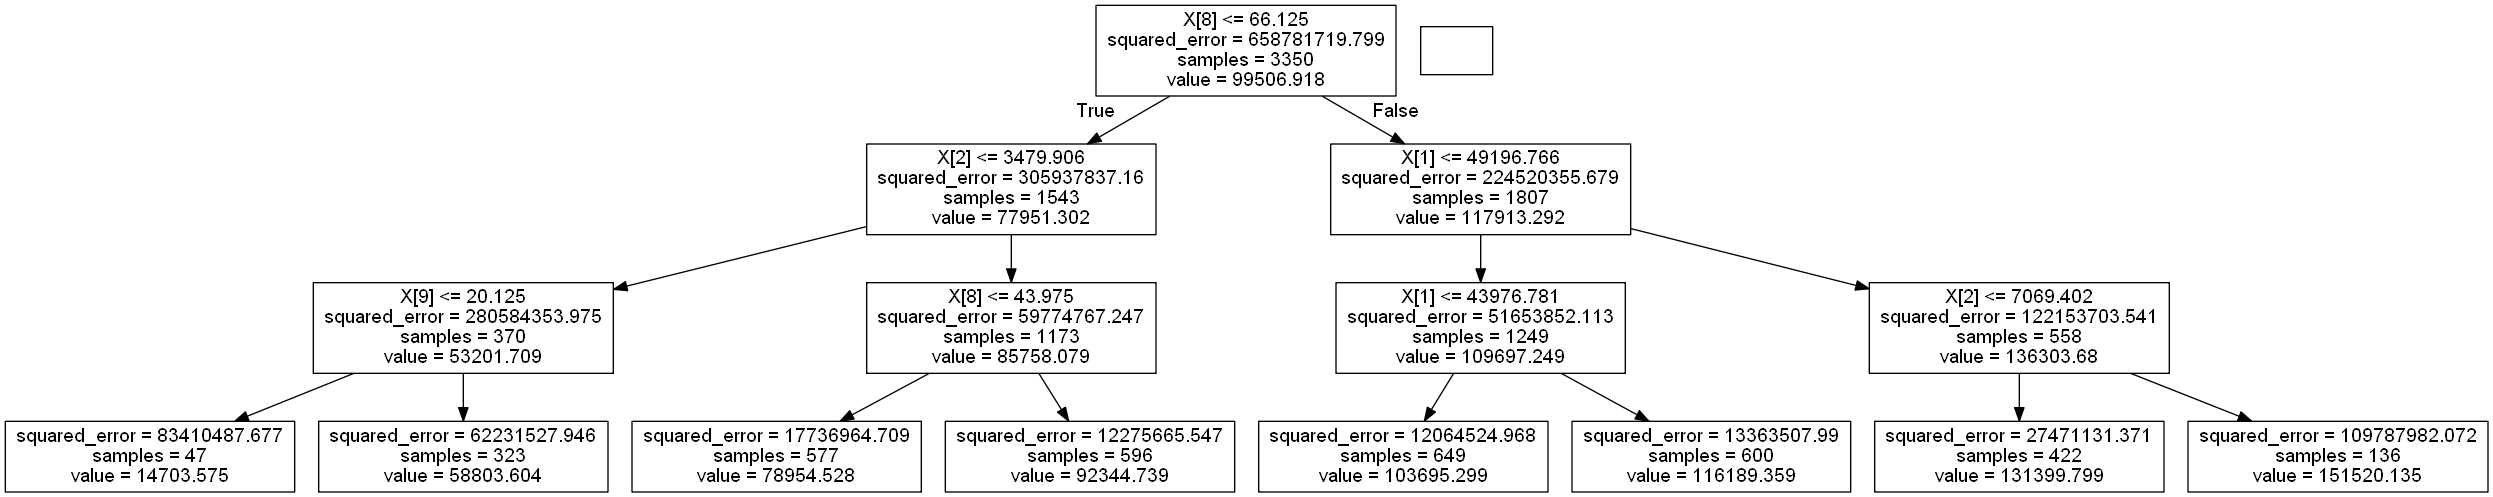

In [96]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

if X[2] >= 4896.243 than it will follow False branch &
if X[2] <= 4896.243 than it will follow True branch 

### As we see there is avg value= 99506.918 of sample and total no of observation are 3350

### At bottom you can see there are 8 leaf notes having average values of each notes

### For better understanding

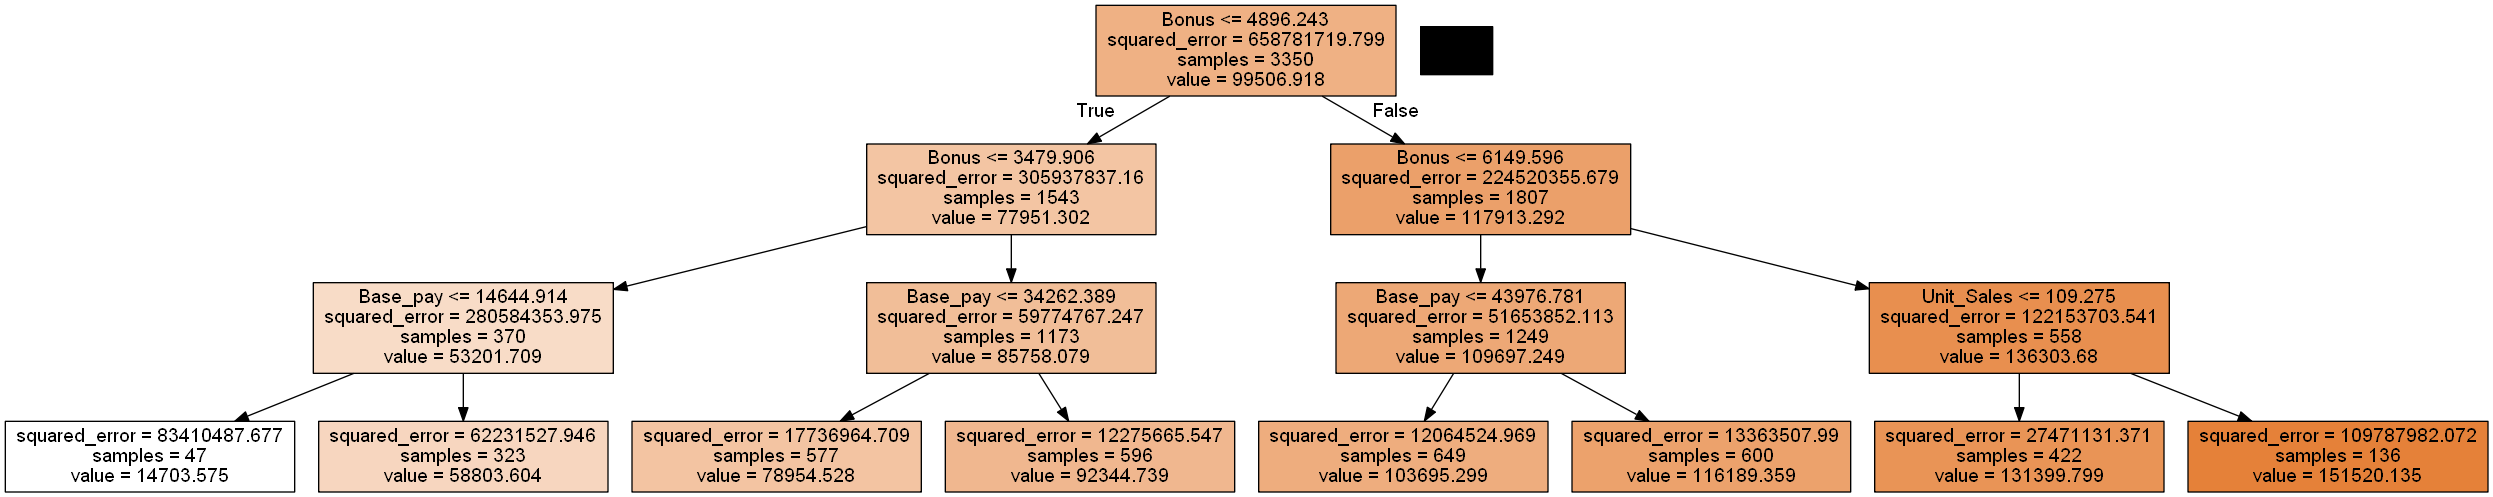

In [97]:
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
regtree1.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree1, out_file=None,feature_names = X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

if Bonus >= 4896.243 than it will follow False branch &
if Bonus <= 4896.243 than it will follow True branch 

### As we see there is avg value= 99506.918 of sample and total no of observation are 3350

### The colour are changing according to the average values 

### White color shows the less collection values(14703) and dark orange shows the high average value(151520)

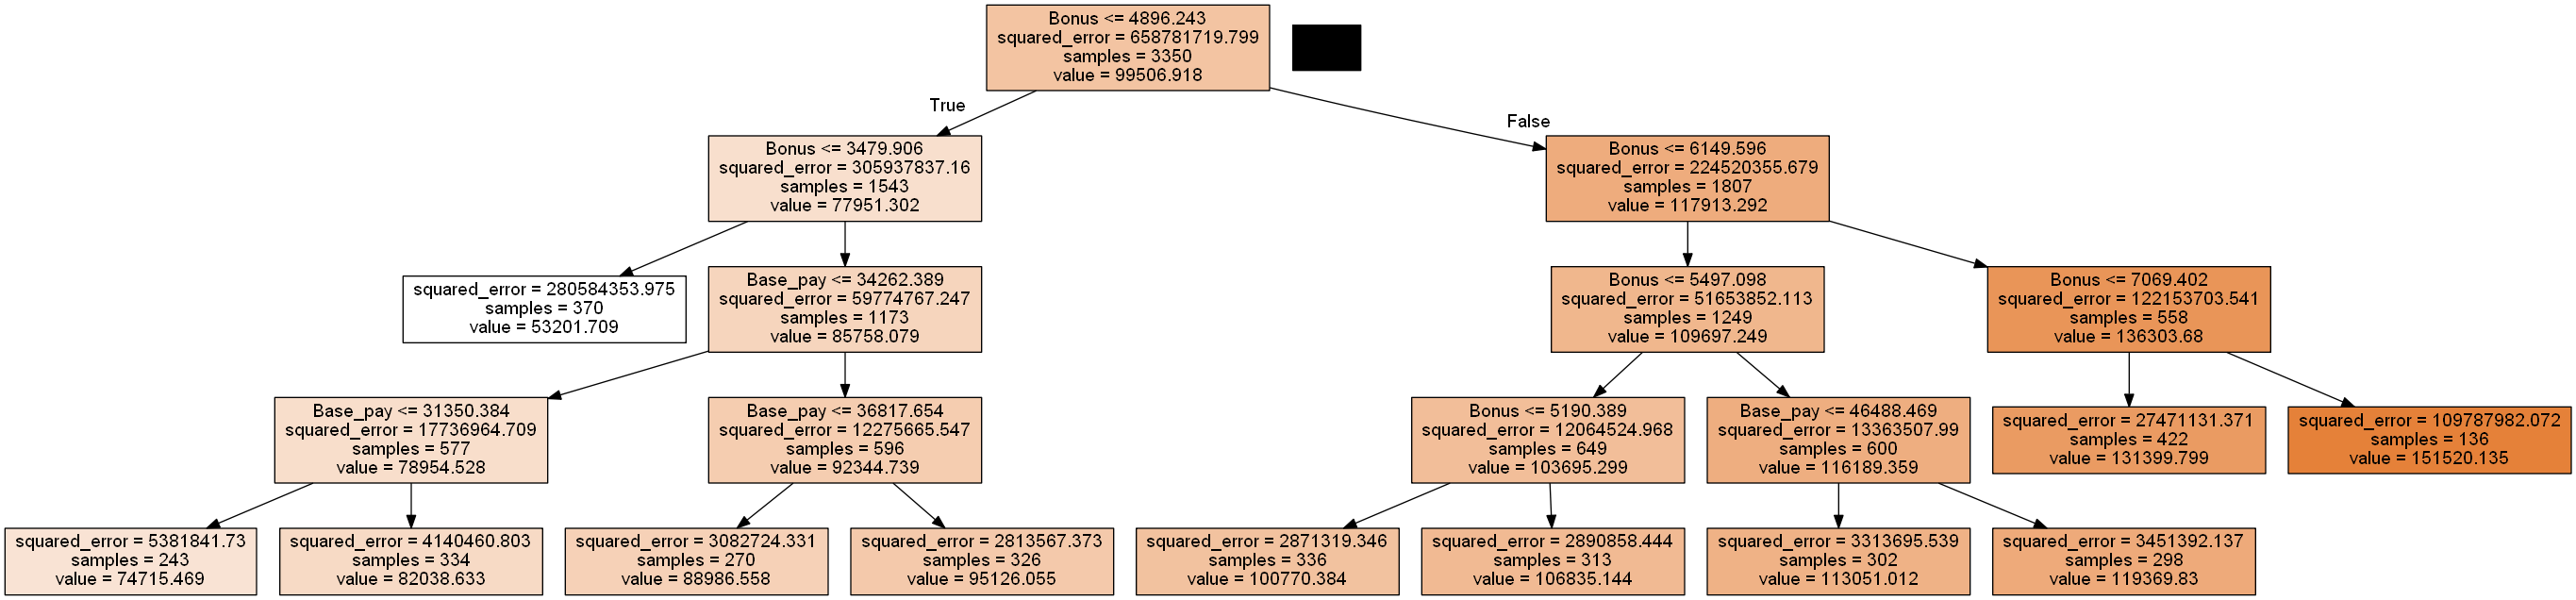

In [98]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 500)
regtree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree2, out_file=None,feature_names = X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

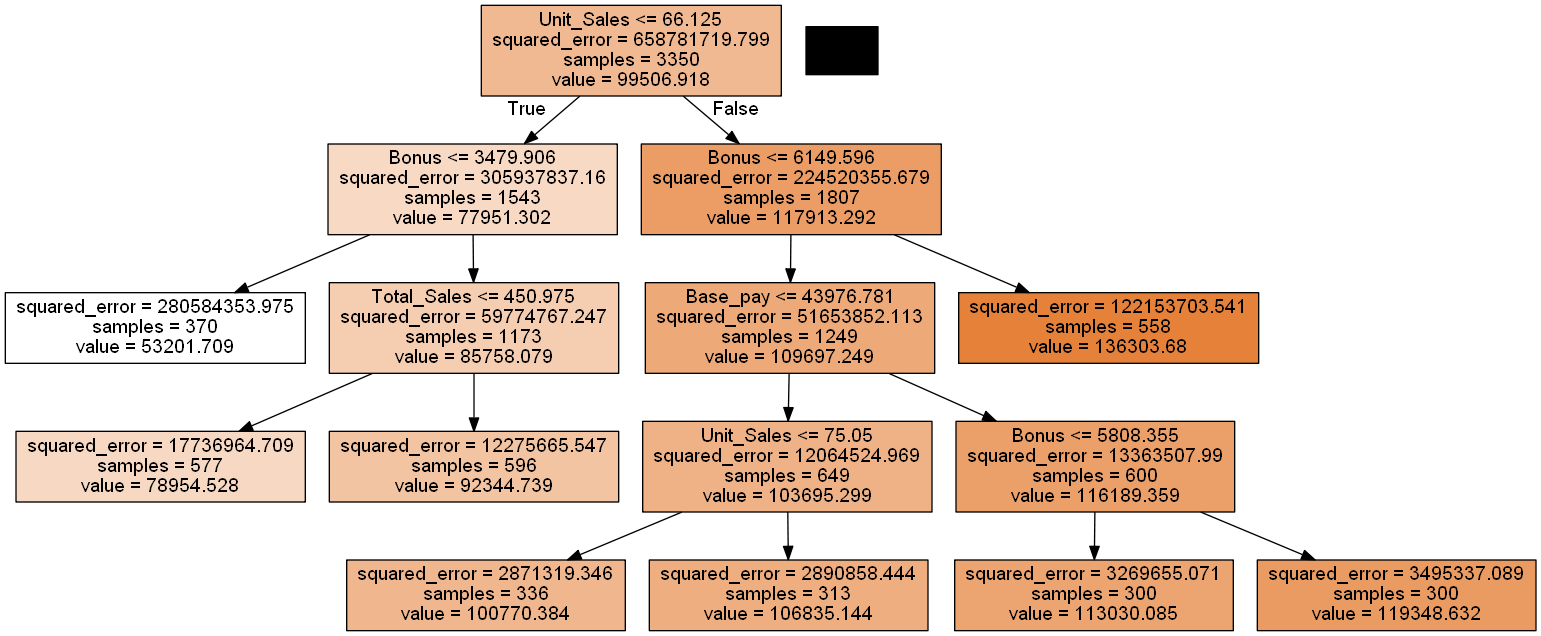

In [99]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 300)
regtree3.fit(X_train, y_train)
dot_data = tree.export_graphviz(regtree3, out_file=None,feature_names = X_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

# Random Forest Regression

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
regressor = RandomForestRegressor(n_estimators = 10, criterion = 'mse')
regressor.fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Temp/ipykernel_52888/3906646571.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', n_estimators=10)

In [102]:
regressor.score(X_test, y_test)

0.999908885392859

### Suppose we increase estimators by 10 times let's see what we get

In [103]:
regressor = RandomForestRegressor(n_estimators = 100, criterion = 'mse')
regressor.fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Temp/ipykernel_52888/1288158881.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:388: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse')

In [104]:
regressor.score(X_test, y_test)

0.9998585169346684

### After increasing estimator by 10 times we got slightly different 'regressor.score'

### The score of Random Forest Regression model is '0.99988..' which is approx to 1.

### Predict the value

In [105]:
regressor.predict([[18,2035.60000,254.450000,3.770000,21226600,3.750000,3.760000,3.650000,18.25,18.80,0]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5462.5443])

### From above code in 'regressor.predict' we take all input values of independent variables(X) from 1st row and got output as 5487.66 which is different from dependent variable(Salary) which is 5089.

In [106]:
X.head(1)

,Age,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
0,18,2035.6,254.45,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0


### We used above values of independent variables(X) in 'regressor predict' code to cross check if our prediction is right or wrong.

In [107]:
df.head(1)

,Gender,Business,Dependancies,Calls,Billing,Rating,Age,Education,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Type,Salary
0,0,0,0,1,0,1,18,1,2035.6,254.45,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,1,5089.0


### We can see here 'Salary' of 1st row is same as 'regressor predict' of independent variables(X), so our prediction is not exact.

In [108]:
y_pred = regressor.predict(X_test)
y_pred

array([ 64599.1518954, 118150.874871 , 143075.963369 , ...,
        82987.2161373,  84288.9946931,  98267.582858 ])

In [109]:
y_test

array([[ 64631.43297],
       [118137.1411 ],
       [143137.3465 ],
       ...,
       [ 82980.10978],
       [ 84297.27007],
       [ 98265.61741]])

### When we compare 'predict(X_test)' it gives values nearer or same as 'y_test'.


## r_2 score

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9998585169346684

### So it is approx 1, the two variables are perfectly correlated, i.e., with no variance at all.

## Plot the Result

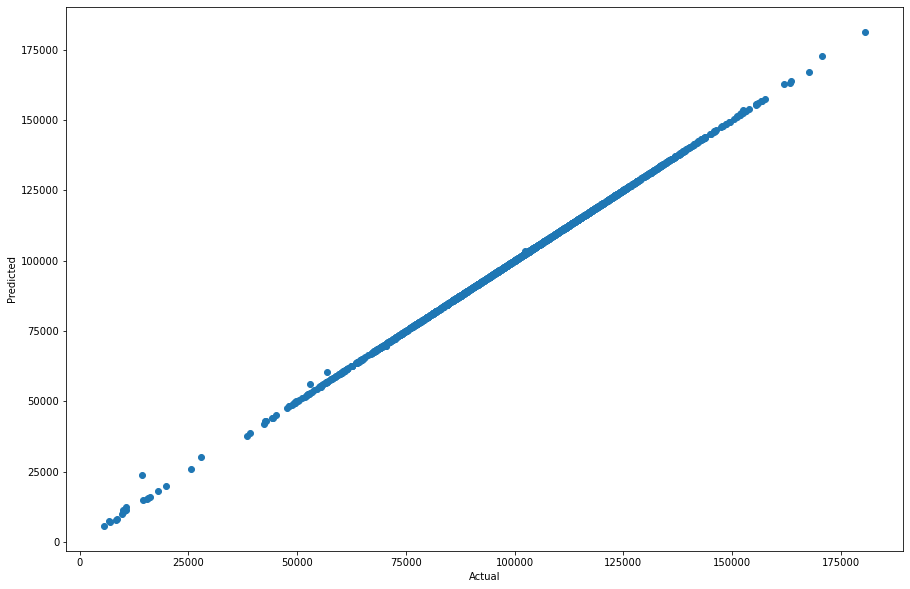

In [111]:
plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title = 'Actual vs Predicted'

# Model Selection

### After comparing two models I've got same r2_score as 1.0 we can look at regressor predict and say that Decision Tree Regression model got independent variables and dependent variable value same as 5089.

### So in model selection I can say Decision Tree Regression is the best model.

# Conclusion

## In this project,I have tried to explore the HR industry data on various variables .

## Though I managed to bring out quite a few insights, 
## 1. Salary of person depends on various feature but it's mainly dependent on Age, Education, Type and Months in a company.
## 2. More educated peoples like Graduated and Post Graduated are more likely to generate huge sales and least educated people are required to get proper training from company which will benificial to the domain financially as well as to the growth of individuals.
## 3. Decision Tree Regression is the best model selection than Random Forest Regression when compared.
## 4. Based on the model selection HR can supervise a company’s hiring process and hold the power of hiring, firing and bringing in new applicants on board. They then set up parameters that define the growth of individuals within an organization, be it deploying training modules, up-skilling employees, or even giving them suggestions to help improve their work ethic.
